2025-12-17
# Check if flatCAF with 1e20 MC has any NC Delta radiative decay signal

1. If yes --> Bug in code, need to investigate
2. If no --> might be bug in production, need to focus on getting dedicated NC Delta samples

In [5]:
import uproot

# Replace 'your_file.root' with the path to your ROOT file
file = uproot.open("output_all.root")
# file = uproot.open("prodgenie_bnb_nu_filtered_NCDeltaRad_sbnd_GenieGenFiltered-20251218T162436_G4-20251218T163938_DetSim-20251218T171908_Reco1-20251218T175925_Reco2-20251218T181002.flat.caf.root")

# tree = "recTree"
tree = "events/simulation"

branches = file[tree].keys()
print(branches)

['POT;1', 'Livetime;1', 'selected_1g0p;1', 'selected_1g1p;1', 'signal_1g0p;1', 'signal_1g1p;1']


In [2]:
import numpy as np

# Select the branches of interest
branch_names = ["rec.mc.nu.isnc", "rec.mc.nu.resnum", "rec.mc.nu.prim.pdg", "rec.hdr.run", "rec.hdr.subrun", "rec.hdr.evt"]

# Load the branches into arrays
arrays = file[tree].arrays(branch_names, library="np")

# Filter entries: isnc == 1 and resnum == 0
# Flatten the jagged arrays and keep track of event indices
isnc = arrays["rec.mc.nu.isnc"]
resnum = arrays["rec.mc.nu.resnum"]
pdg = arrays["rec.mc.nu.prim.pdg"]

run = arrays["rec.hdr.run"]
subrun = arrays["rec.hdr.subrun"]
evt = arrays["rec.hdr.evt"]

filtered_pdg = []

for i in range(len(isnc)):
    if 22 not in pdg[i]:
        continue

    for j in range(len(isnc[i])):
        if (isnc[i][j] == 1) and (resnum[i][j] == 0):


            filtered_pdg.append(pdg[i][j])
            print(i,j)

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0


In [55]:
def find_event_index(runNum, subrunNum, evtNum):
    for idx in range(len(run)):
        if (run[idx] == runNum) and (subrun[idx] == subrunNum) and (evt[idx] == evtNum):
            return idx
    return None

# Example usage:
idx = find_event_index(54, 49, 18)
print(idx)

1973


In [61]:
for x in [(54, 49, 18), (60, 80, 35), (72,91,86), (71,84,22)]:
    idx = find_event_index(x[0], x[1], x[2])

    print('isnc: ', isnc[idx])
    print('resnum:', resnum[idx])
    print('pdg:', pdg[idx])

    print('run:', run[idx], 'subrun:', subrun[idx], 'evt:', evt[idx])

isnc:  [1]
resnum: [0]
pdg: [  14   22 2112 2212]
run: 54 subrun: 49 evt: 18
isnc:  [0 1]
resnum: [-1  0]
pdg: [  13 2212 2212  -14   22 2112]
run: 60 subrun: 80 evt: 35
isnc:  [1]
resnum: [0]
pdg: [  14   22 2212 2212 2212 2212 2212 2212 2212 2212 2212 2112 2112 2112
 2112 2112 2112]
run: 72 subrun: 91 evt: 86
isnc:  [1]
resnum: [0]
pdg: [  14   22   22 2212]
run: 71 subrun: 84 evt: 22


In [5]:
idx = 6

print('isnc: ', isnc[idx])
print('resnum:', resnum[idx])
print('pdg:', pdg[idx])

print('run:', run[idx], 'subrun:', subrun[idx], 'evt:', evt[idx])

isnc:  [1]
resnum: [0]
pdg: [  14   22 2212]
run: 1 subrun: 0 evt: 1281


2025-12-22
# Calculate basic Purity/Efficiency from 1e20 MC gORe selection

In [6]:
import uproot

# Replace 'your_file.root' with the path to your ROOT file
file = uproot.open("output_all.root")

tree = "events/simulation"

branches = file[tree].keys()
print(branches)

['POT;1', 'Livetime;1', 'selected_1g0p;1', 'selected_1g1p;1', 'signal_1g0p;1', 'signal_1g1p;1']


In [38]:
OneG0p = file["events/simulation/selected_1g0p"]
data = OneG0p.arrays(['true_mc_category'], library="np")

# Flatten the jagged array
true_mc_category = data['true_mc_category']

selected_entries = true_mc_category[true_mc_category == 0]
print(selected_entries.shape)

(681,)


In [39]:
OneG1p = file["events/simulation/selected_1g1p"]
data = OneG1p.arrays(['true_mc_category'], library="np")

# Flatten the jagged array
true_mc_category = data['true_mc_category']

selected_entries = true_mc_category[true_mc_category == 0]
print(selected_entries.shape)

(500,)


## Calculate Post-selection variables

In [49]:
OneG0p = file["events/simulation/selected_1g0p"]
data = OneG0p.arrays(['true_mc_category', 'reco_leading_primary_gOre_photon_softmax', 'reco_leading_primary_gOre_start_dedx', 'reco_leading_primary_gOre_axial_spread', 'reco_leading_primary_gOre_directional_spread'], library="np")

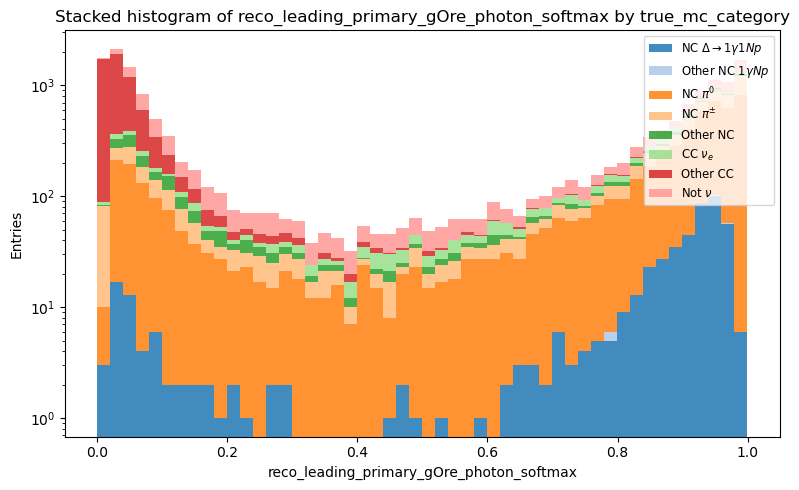

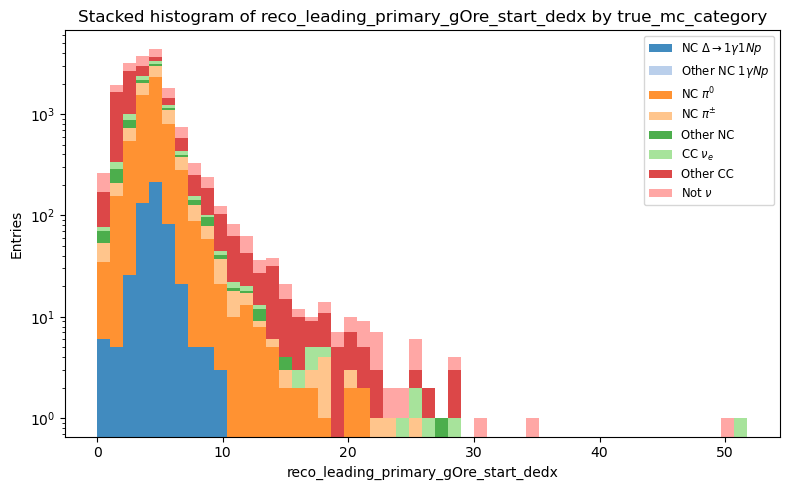

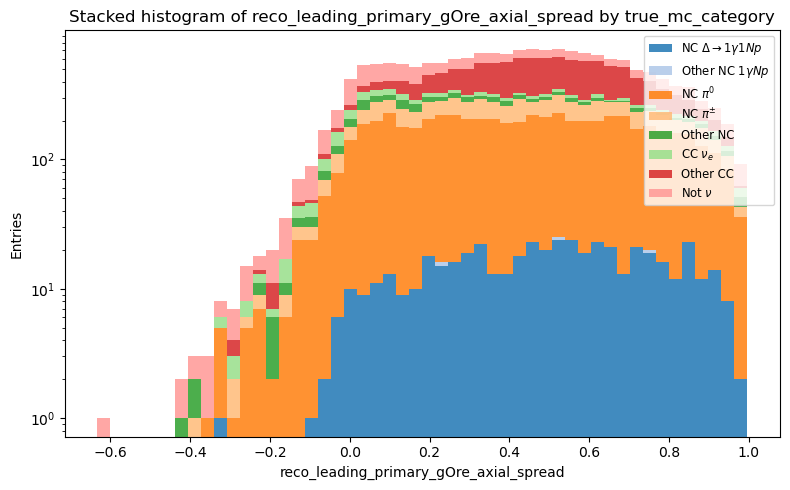

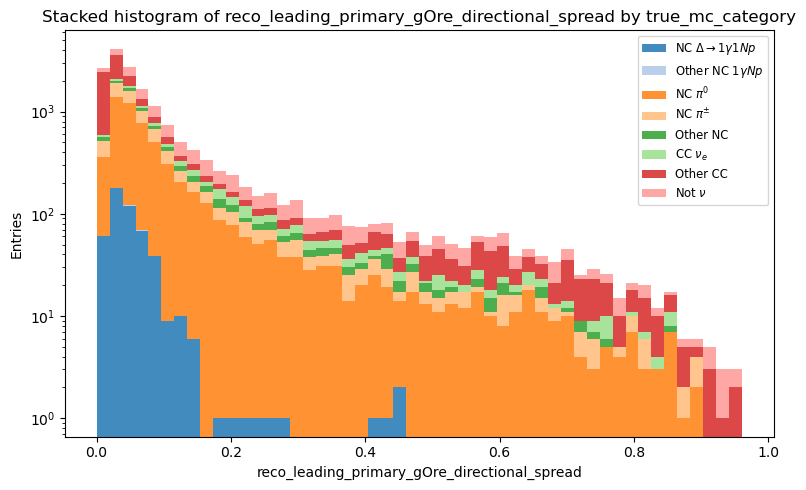

In [66]:
import matplotlib.pyplot as plt
import numpy as np

variables = ['reco_leading_primary_gOre_photon_softmax',
             'reco_leading_primary_gOre_start_dedx',
             'reco_leading_primary_gOre_axial_spread',
             'reco_leading_primary_gOre_directional_spread']

# Category labels in order (0..7) — use LaTeX math for Greek/arrow
labels = [
    r'NC $\Delta\rightarrow1\gamma 1Np$',
    r'Other NC 1$\gamma Np$',
    r'NC $\pi^{0}$',
    r'NC $\pi^{\pm}$',
    r'Other NC',
    r'CC $\nu_e$',
    r'Other CC',
    r'Not $\nu$',
]

# Colors (slice of a colormap to match number of labels)
colors = plt.cm.tab20.colors[:len(labels)]

for var in variables:
    # collect arrays for each category (handles empty arrays)
    arrays = []
    present_labels = []
    for idx, lab in enumerate(labels):
        mask = (data['true_mc_category'] == idx)
        vals = data[var][mask]
        arrays.append(vals)
        present_labels.append(lab)

    plt.figure(figsize=(8,5))
    plt.hist(arrays, bins=50, stacked=True, label=present_labels, color=colors, alpha=0.85)
    plt.xlabel(var)
    plt.ylabel('Entries')
    plt.yscale('log')
    plt.legend(loc='upper right', fontsize='small')
    plt.title(f'Stacked histogram of {var} by true_mc_category')
    plt.tight_layout()
    plt.show()

In [64]:
OneG1p = file["events/simulation/selected_1g1p"]
data = OneG1p.arrays(['true_mc_category', 'reco_leading_primary_gOre_photon_softmax', 'reco_leading_primary_gOre_start_dedx', 'reco_leading_primary_gOre_axial_spread', 'reco_leading_primary_gOre_directional_spread'], library="np")

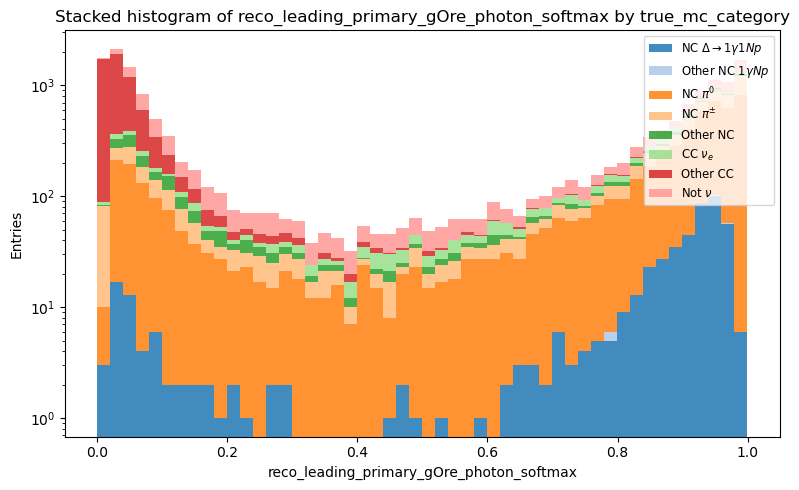

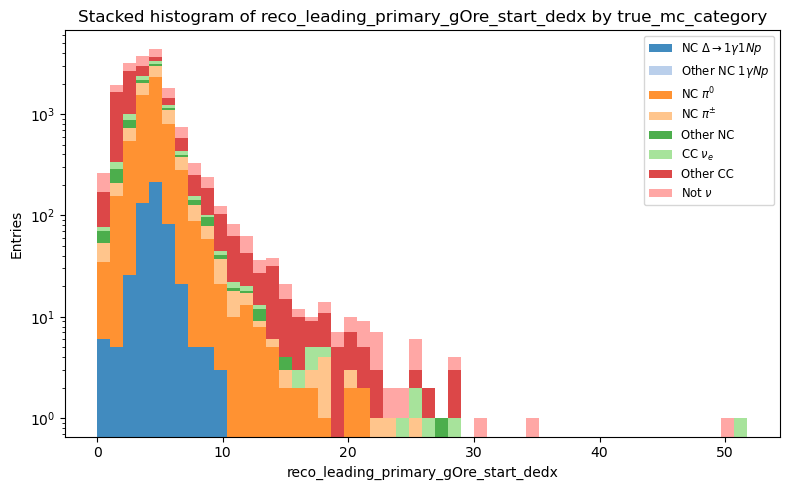

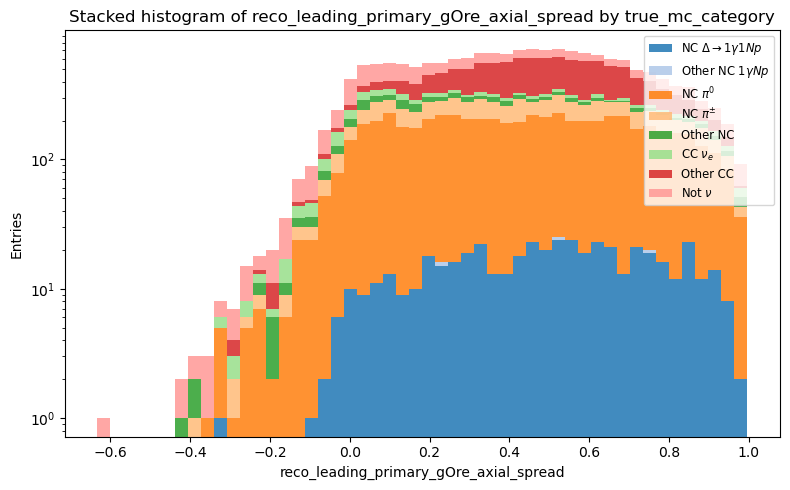

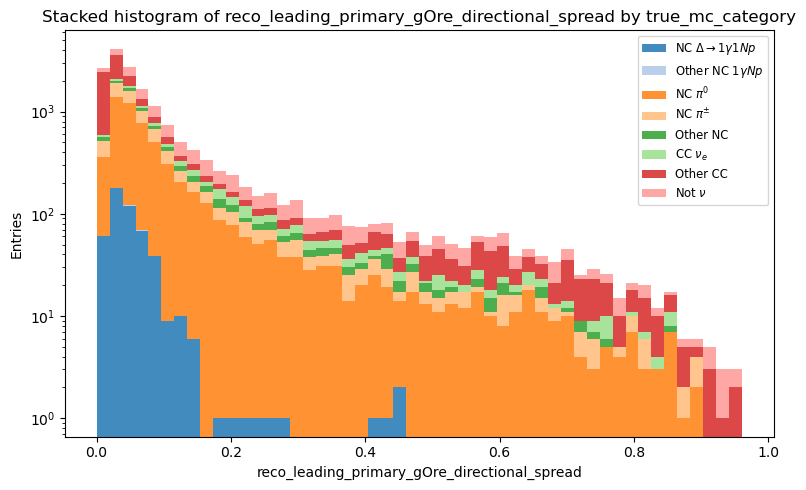

In [67]:
import matplotlib.pyplot as plt
import numpy as np

variables = ['reco_leading_primary_gOre_photon_softmax',
             'reco_leading_primary_gOre_start_dedx',
             'reco_leading_primary_gOre_axial_spread',
             'reco_leading_primary_gOre_directional_spread']

# Category labels in order (0..7) — use LaTeX math for Greek/arrow
labels = [
    r'NC $\Delta\rightarrow1\gamma 1Np$',
    r'Other NC 1$\gamma Np$',
    r'NC $\pi^{0}$',
    r'NC $\pi^{\pm}$',
    r'Other NC',
    r'CC $\nu_e$',
    r'Other CC',
    r'Not $\nu$',
]

# Colors (slice of a colormap to match number of labels)
colors = plt.cm.tab20.colors[:len(labels)]

for var in variables:
    # collect arrays for each category (handles empty arrays)
    arrays = []
    present_labels = []
    for idx, lab in enumerate(labels):
        mask = (data['true_mc_category'] == idx)
        vals = data[var][mask]
        arrays.append(vals)
        present_labels.append(lab)

    plt.figure(figsize=(8,5))
    plt.hist(arrays, bins=50, stacked=True, label=present_labels, color=colors, alpha=0.85)
    plt.xlabel(var)
    plt.ylabel('Entries')
    plt.yscale('log')
    plt.legend(loc='upper right', fontsize='small')
    plt.title(f'Stacked histogram of {var} by true_mc_category')
    plt.tight_layout()
    plt.show()

## Do Post-Selection for g/e separation

In [111]:
OneG0p = file["events/simulation/selected_1g0p"]
data = OneG0p.arrays(['true_mc_category', 'reco_leading_primary_gOre_photon_softmax', 'reco_leading_primary_gOre_start_dedx', 'reco_leading_primary_gOre_axial_spread', 'reco_leading_primary_gOre_directional_spread'], library="np")
# Extract arrays
softmax = data['reco_leading_primary_gOre_photon_softmax']
dedx = data['reco_leading_primary_gOre_start_dedx']
axial_spread = data['reco_leading_primary_gOre_axial_spread']
directional_spread = data['reco_leading_primary_gOre_directional_spread']

# Apply selection criteria
selected_mask = (
    (softmax > 0.092) &
    (softmax < 0.98) &
    (dedx < 10) &
    (axial_spread > -0.2) &
    (directional_spread < 0.2)
)

selected_entries = data['true_mc_category'][selected_mask]
print(selected_entries.shape)

selected_entries_true = selected_entries[selected_entries == 0]
print(selected_entries_true.shape)

(22762,)
(659,)


In [86]:
OneG1p = file["events/simulation/selected_1g1p"]
data = OneG1p.arrays(['true_mc_category', 'reco_leading_primary_gOre_photon_softmax', 'reco_leading_primary_gOre_start_dedx', 'reco_leading_primary_gOre_axial_spread', 'reco_leading_primary_gOre_directional_spread'], library="np")
# Extract arrays
softmax = data['reco_leading_primary_gOre_photon_softmax']
dedx = data['reco_leading_primary_gOre_start_dedx']
axial_spread = data['reco_leading_primary_gOre_axial_spread']
directional_spread = data['reco_leading_primary_gOre_directional_spread']

# Apply selection criteria
selected_mask = (
    (softmax > 0.6) &
    (dedx < 11) &
    (axial_spread > -0.2) &
    (directional_spread < 0.05)
)

selected_entries = data['true_mc_category'][selected_mask]
print(selected_entries.shape)

selected_entries_true = selected_entries[selected_entries == 0]
print(selected_entries_true.shape)

(3521,)
(267,)


2025-12-23

### Explore Selected Signal

In [89]:
import uproot
# Replace 'your_file.root' with the path to your ROOT file
file = uproot.open("output_all.root")
OneG1p = file["events/simulation/selected_1g1p"]
OneG0p = file["events/simulation/selected_1g0p"]

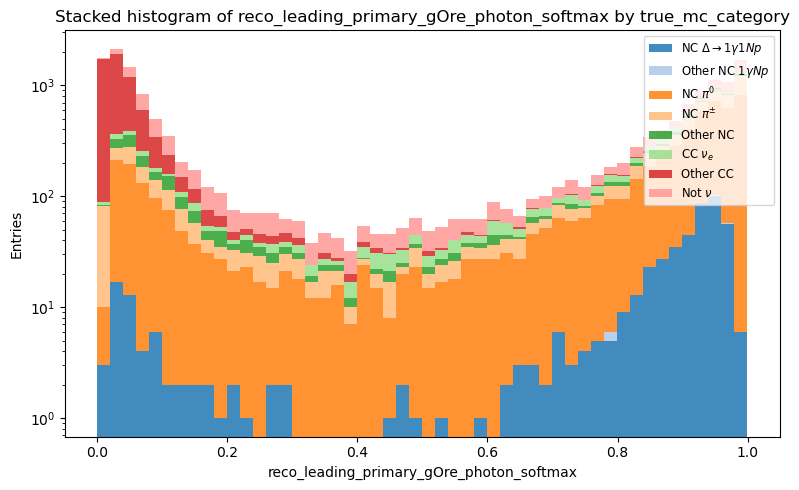

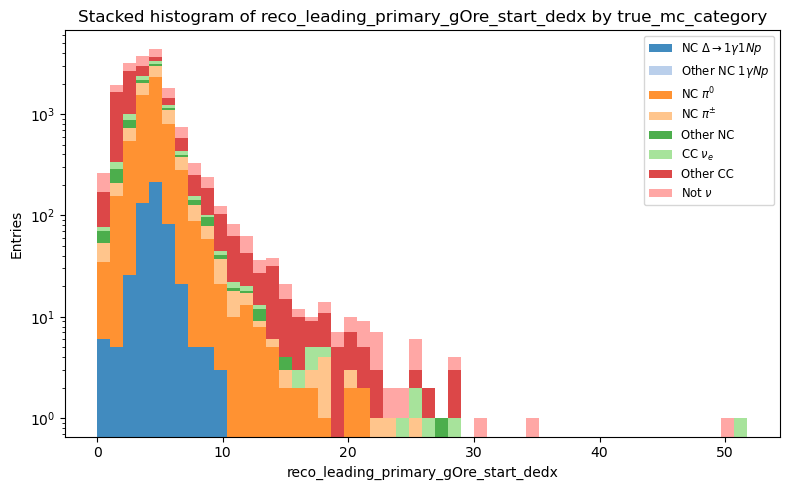

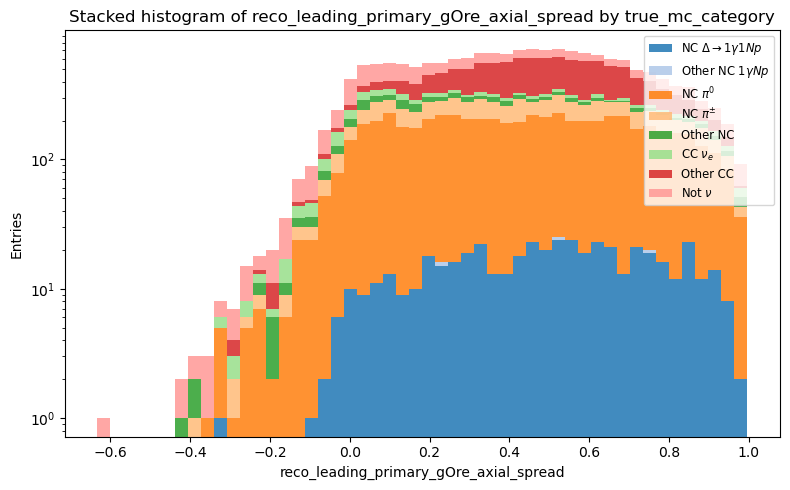

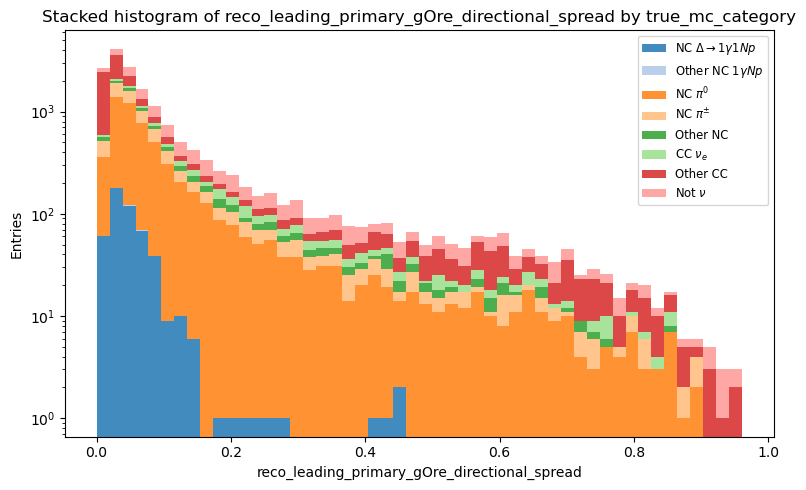

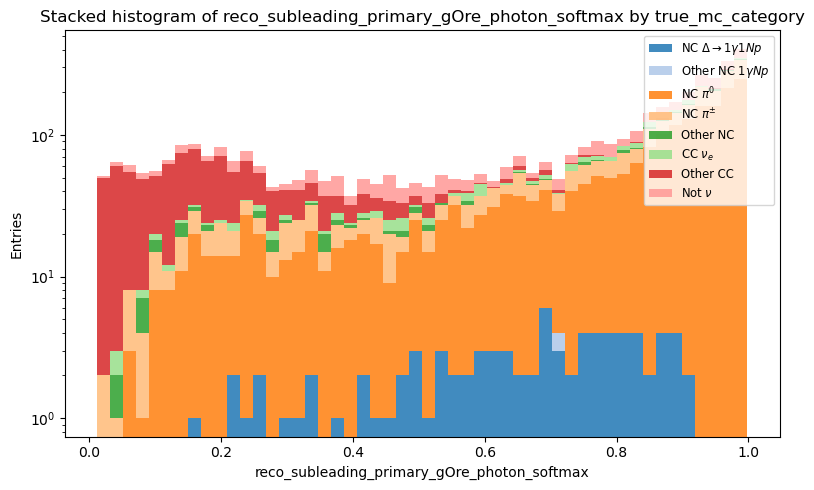

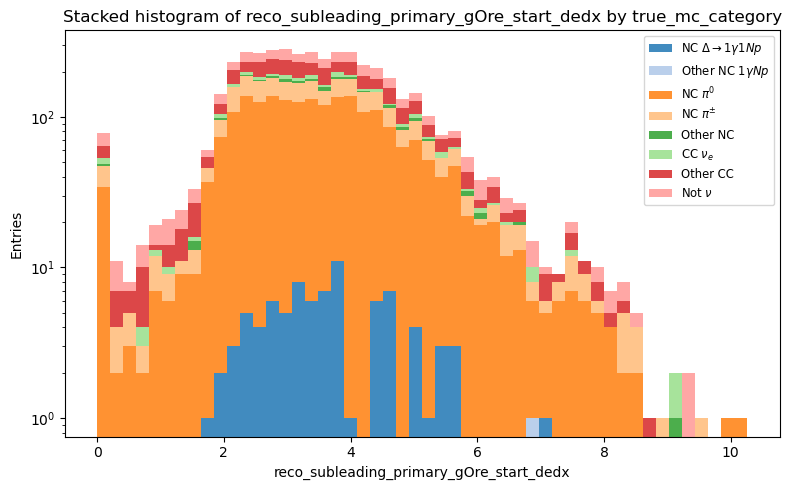

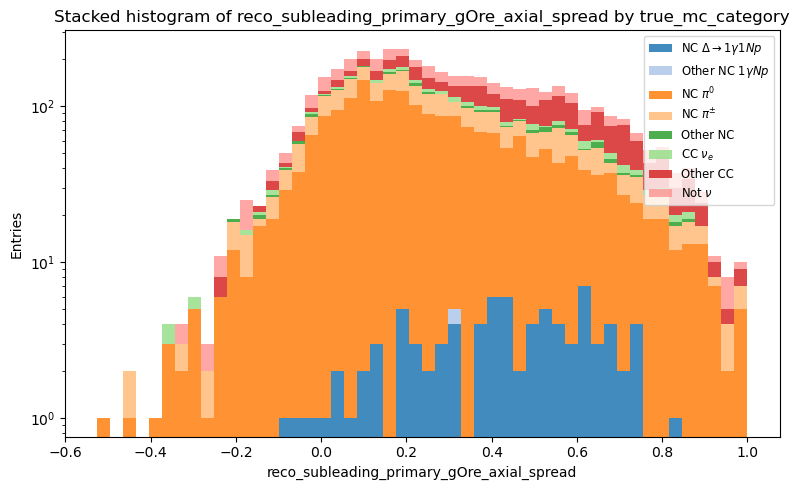

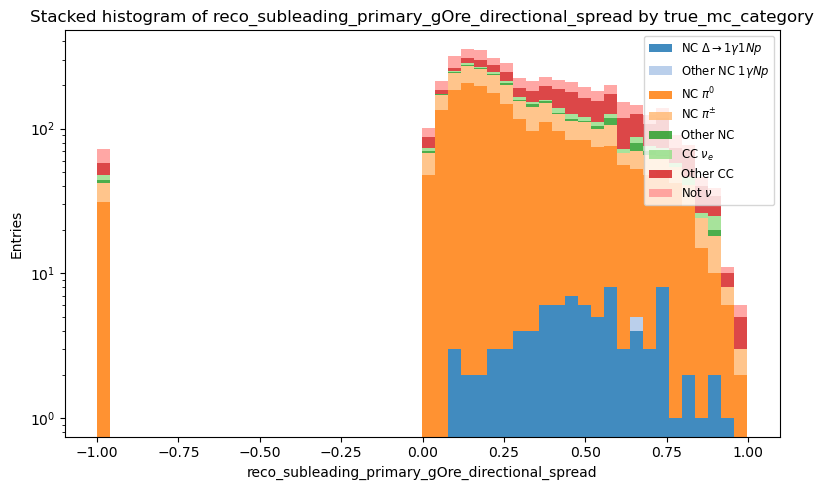

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

variables = ['reco_leading_primary_gOre_photon_softmax',
             'reco_leading_primary_gOre_start_dedx',
             'reco_leading_primary_gOre_axial_spread',
             'reco_leading_primary_gOre_directional_spread',
             'reco_subleading_primary_gOre_photon_softmax',
             'reco_subleading_primary_gOre_start_dedx',
             'reco_subleading_primary_gOre_axial_spread',
             'reco_subleading_primary_gOre_directional_spread']

data = OneG1p.arrays(['true_mc_category', 'true_category'] + variables, library="np")

# Category labels in order (0..7) — use LaTeX math for Greek/arrow
labels = [
    r'NC $\Delta\rightarrow1\gamma 1Np$',
    r'Other NC 1$\gamma Np$',
    r'NC $\pi^{0}$',
    r'NC $\pi^{\pm}$',
    r'Other NC',
    r'CC $\nu_e$',
    r'Other CC',
    r'Not $\nu$',
]

# Colors (slice of a colormap to match number of labels)
colors = plt.cm.tab20.colors[:len(labels)]

for var in variables:
    # collect arrays for each category (handles empty arrays)
    arrays = []
    present_labels = []
    for idx, lab in enumerate(labels):
        mask = (data['true_mc_category'] == idx)
        vals = data[var][mask]
        arrays.append(vals)
        present_labels.append(lab)

    plt.figure(figsize=(8,5))
    plt.hist(arrays, bins=50, stacked=True, label=present_labels, color=colors, alpha=0.85)
    plt.xlabel(var)
    plt.ylabel('Entries')
    plt.yscale('log')
    plt.legend(loc='upper right', fontsize='small')
    plt.title(f'Stacked histogram of {var} by true_mc_category')
    plt.tight_layout()
    plt.show()

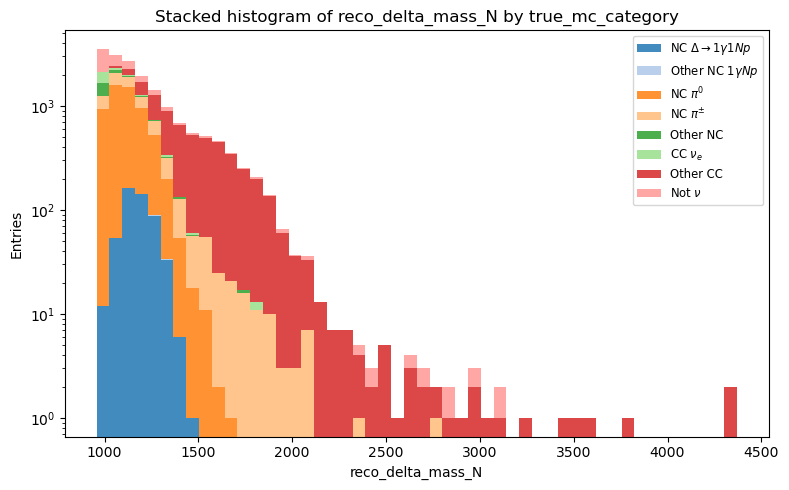

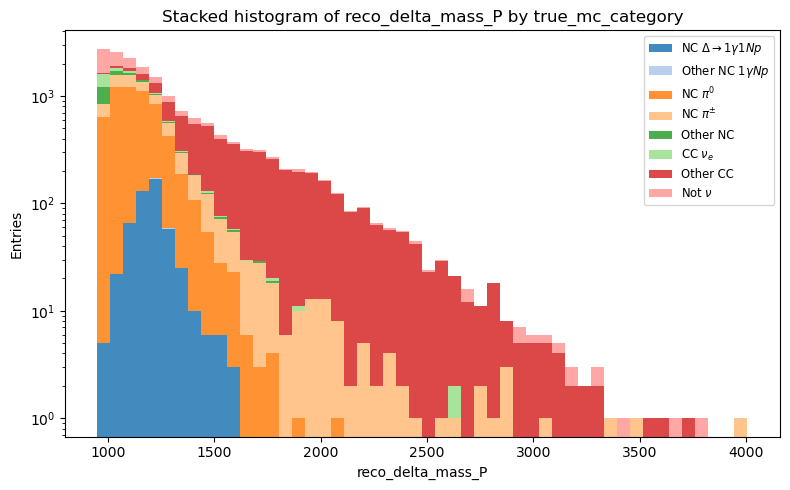

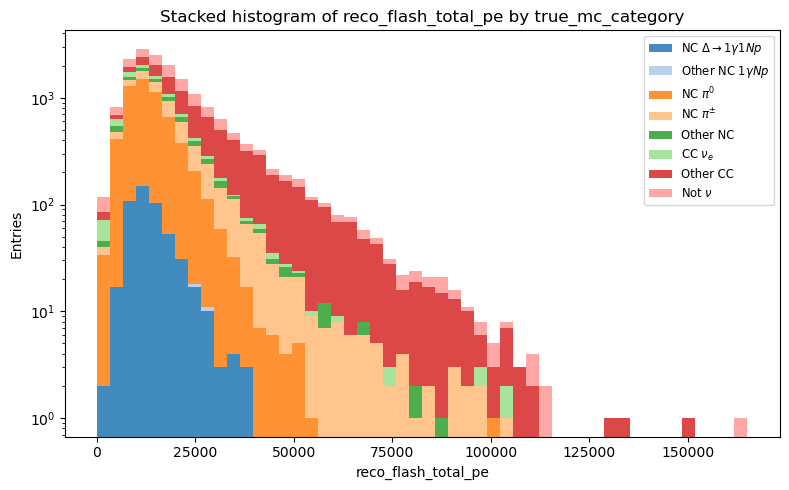

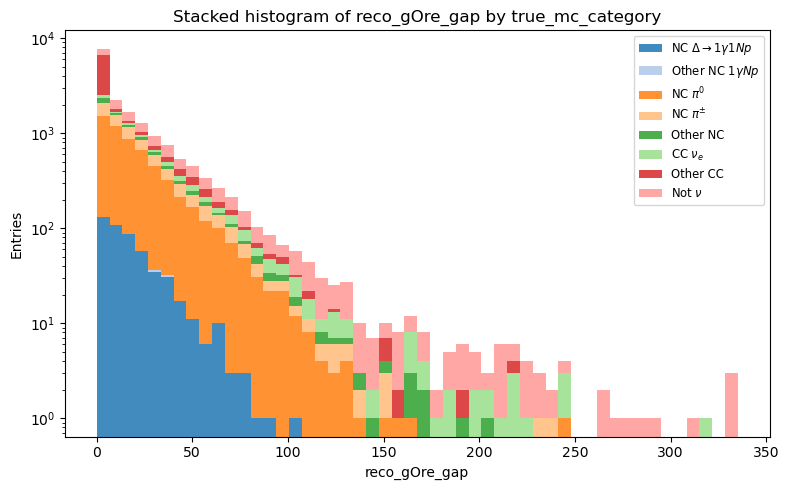

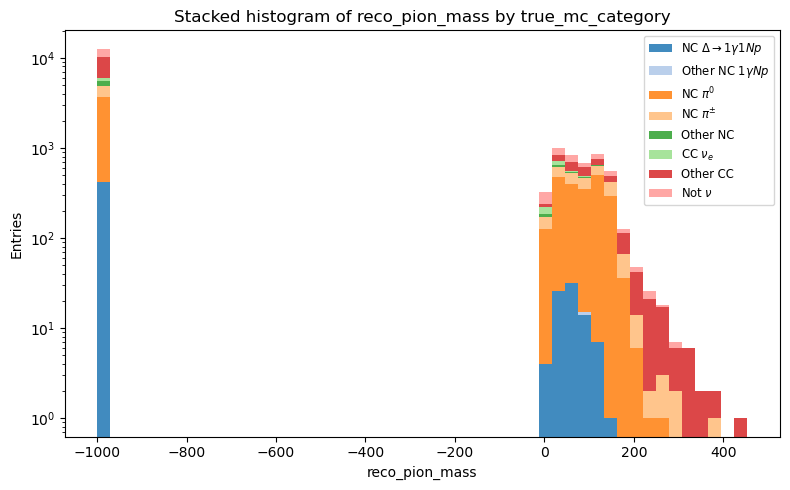

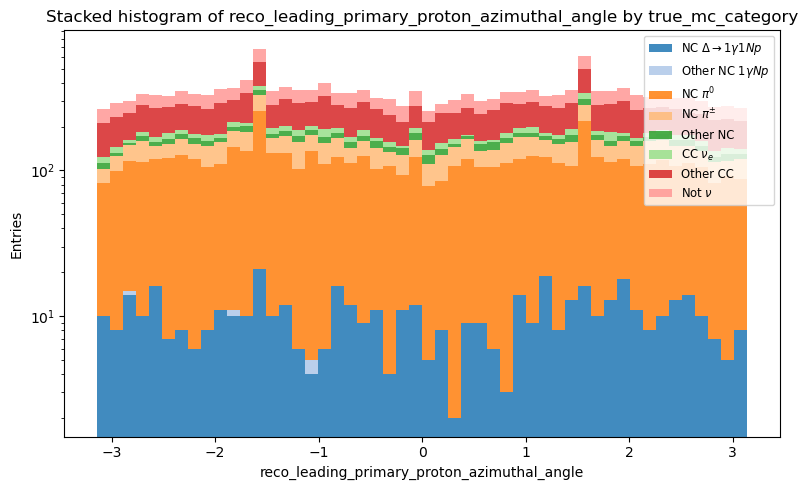

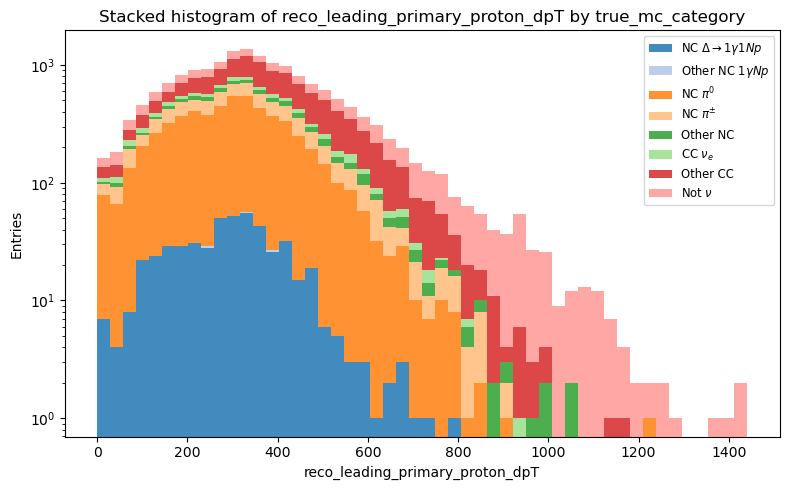

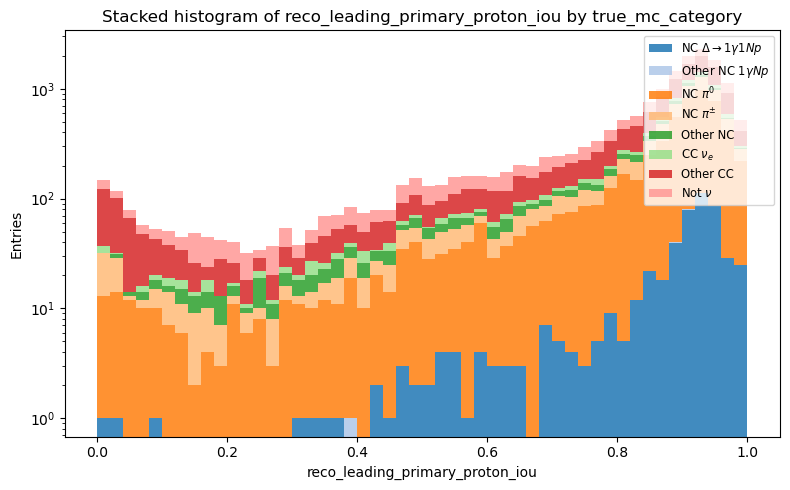

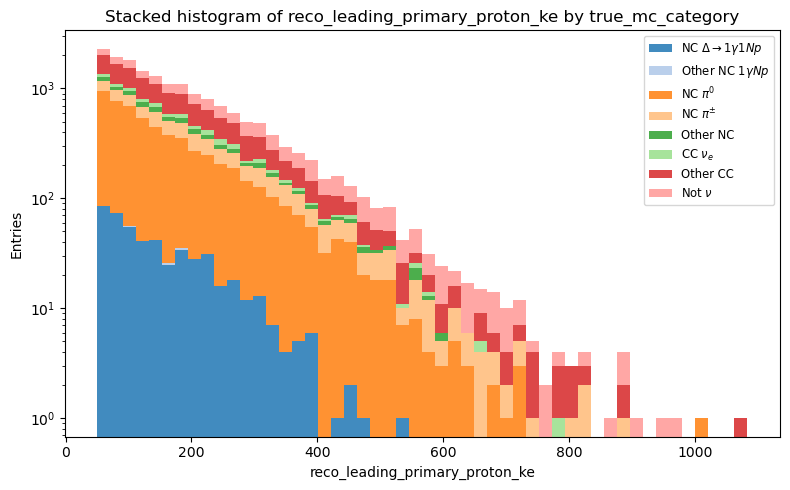

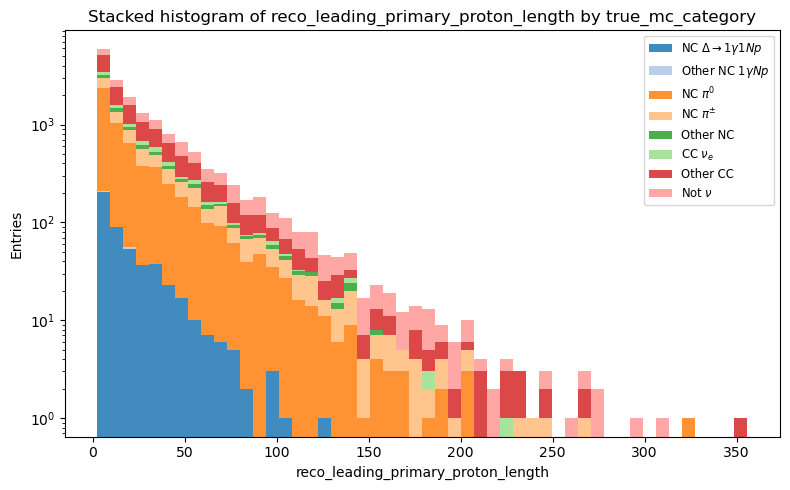

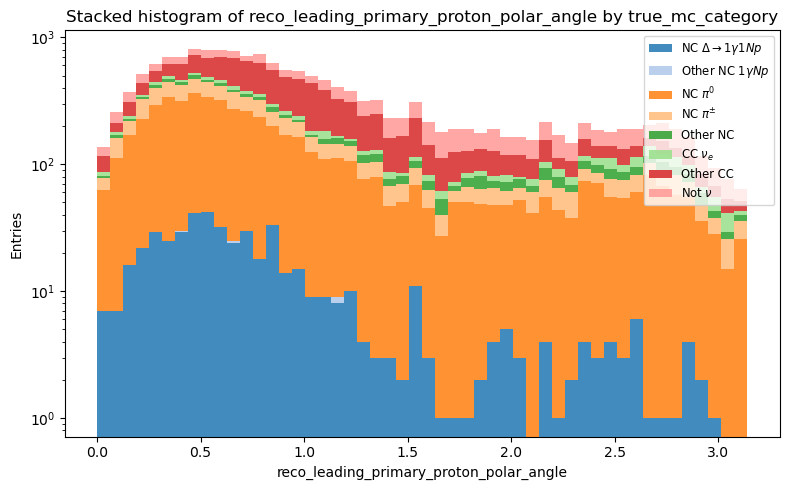

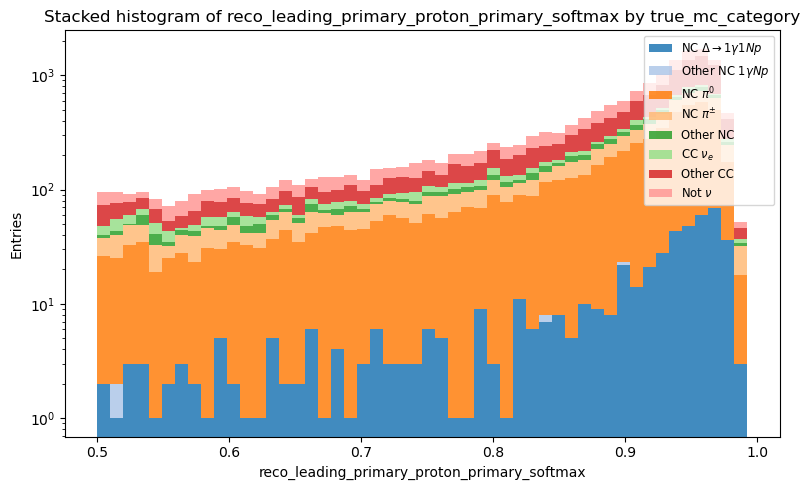

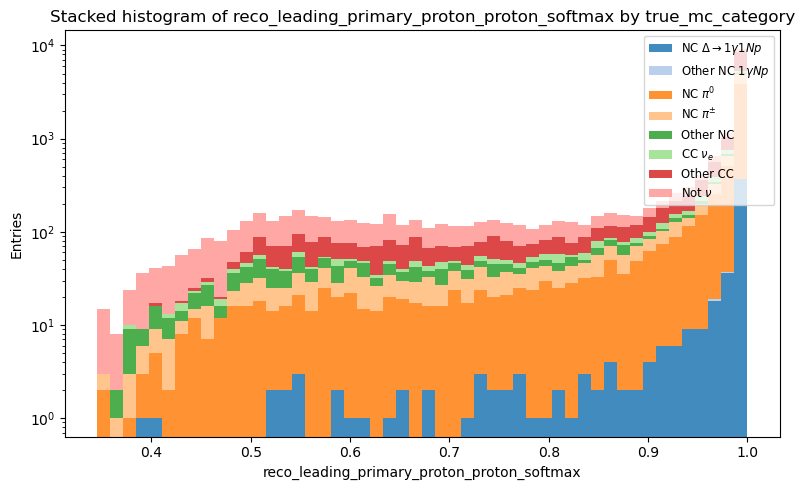

In [88]:
import matplotlib.pyplot as plt
import numpy as np

variables = ['reco_delta_mass_N',
             'reco_delta_mass_P',
             'reco_flash_total_pe',
             'reco_gOre_gap',
             'reco_pion_mass',
             'reco_leading_primary_proton_azimuthal_angle',
             'reco_leading_primary_proton_dpT',
             'reco_leading_primary_proton_iou',
             'reco_leading_primary_proton_ke',
             'reco_leading_primary_proton_length',
             'reco_leading_primary_proton_polar_angle',
             'reco_leading_primary_proton_primary_softmax',
             'reco_leading_primary_proton_proton_softmax',]

data = OneG1p.arrays(['true_mc_category', 'true_category'] + variables, library="np")


# Category labels in order (0..7) — use LaTeX math for Greek/arrow
labels = [
    r'NC $\Delta\rightarrow1\gamma 1Np$',
    r'Other NC 1$\gamma Np$',
    r'NC $\pi^{0}$',
    r'NC $\pi^{\pm}$',
    r'Other NC',
    r'CC $\nu_e$',
    r'Other CC',
    r'Not $\nu$',
]

# Colors (slice of a colormap to match number of labels)
colors = plt.cm.tab20.colors[:len(labels)]

for var in variables:
    # collect arrays for each category (handles empty arrays)
    arrays = []
    present_labels = []
    for idx, lab in enumerate(labels):
        mask = (data['true_mc_category'] == idx)
        vals = data[var][mask]
        arrays.append(vals)
        present_labels.append(lab)

    plt.figure(figsize=(8,5))
    plt.hist(arrays, bins=50, stacked=True, label=present_labels, color=colors, alpha=0.85)
    plt.xlabel(var)
    plt.ylabel('Entries')
    plt.yscale('log')
    plt.legend(loc='upper right', fontsize='small')
    plt.title(f'Stacked histogram of {var} by true_mc_category')
    plt.tight_layout()
    plt.show()

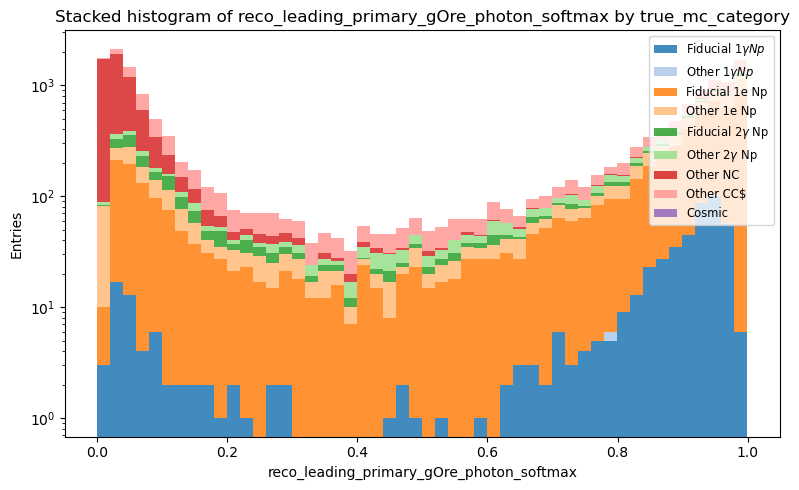

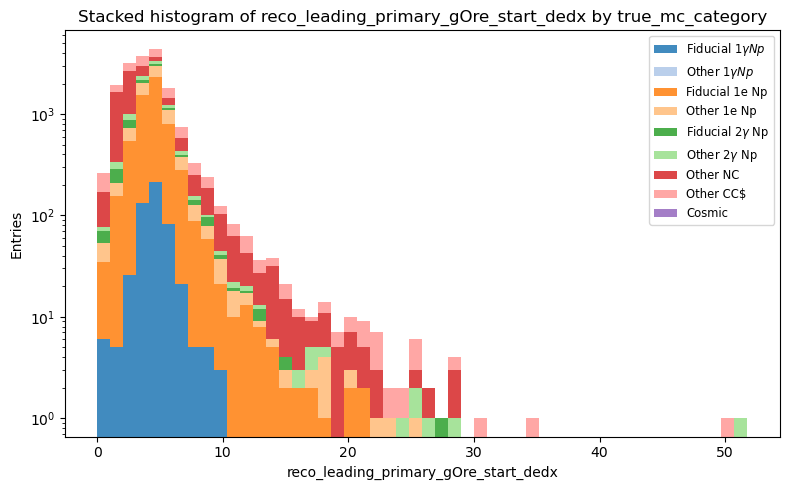

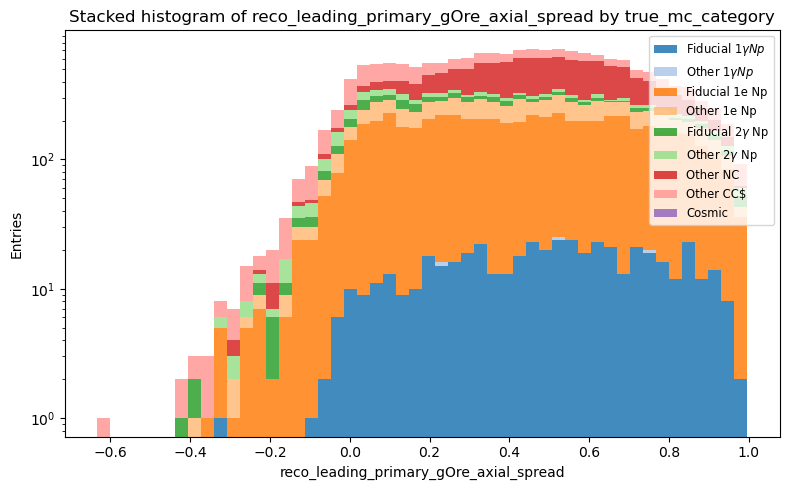

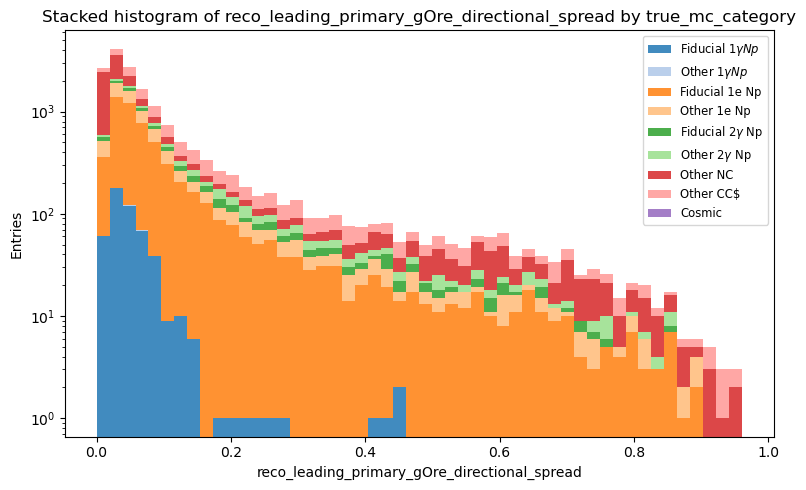

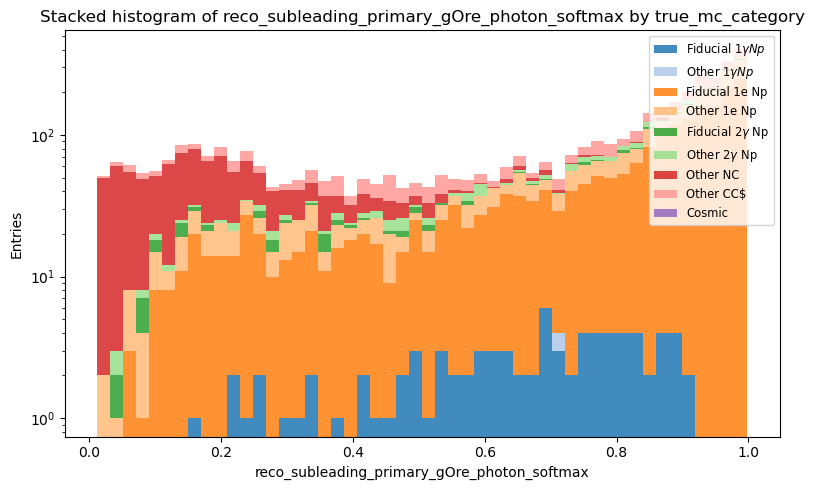

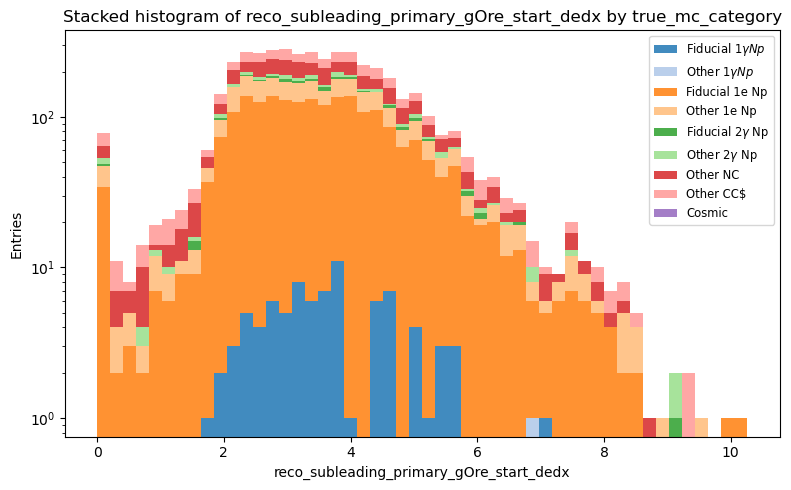

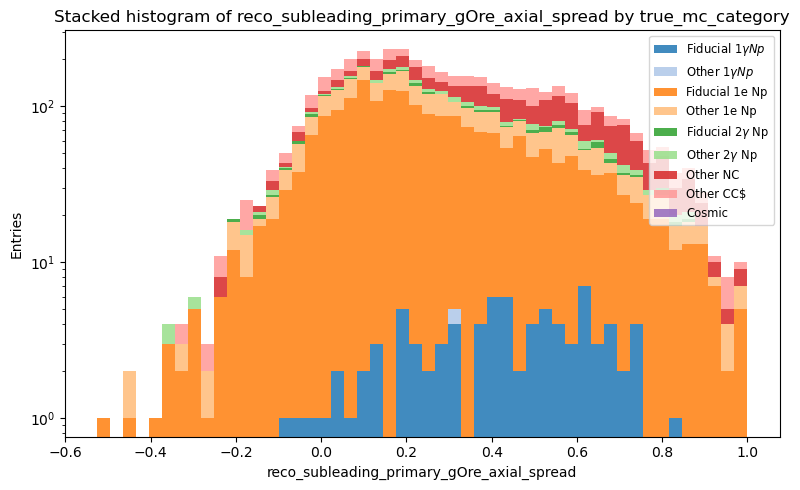

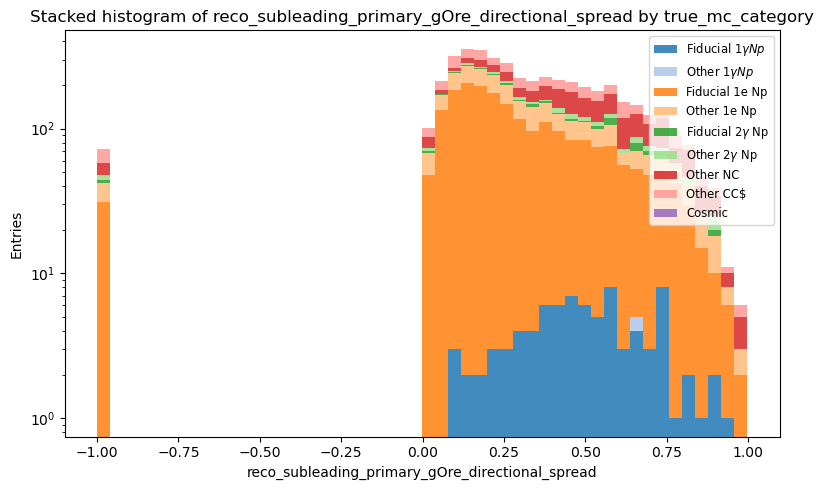

In [81]:
import matplotlib.pyplot as plt
import numpy as np

variables = ['reco_leading_primary_gOre_photon_softmax',
             'reco_leading_primary_gOre_start_dedx',
             'reco_leading_primary_gOre_axial_spread',
             'reco_leading_primary_gOre_directional_spread',
             'reco_subleading_primary_gOre_photon_softmax',
             'reco_subleading_primary_gOre_start_dedx',
             'reco_subleading_primary_gOre_axial_spread',
             'reco_subleading_primary_gOre_directional_spread']

# Category labels in order (0..7) — use LaTeX math for Greek/arrow
labels = [
    r'Fiducial 1$\gamma Np$',
    r'Other 1$\gamma Np$',
    r'Fiducial 1e Np',
    r'Other 1e Np',
    r'Fiducial 2$\gamma$ Np',
    r'Other 2$\gamma$ Np',
    r'Other NC',
    r'Other CC$',
    r'Cosmic'
]

# Colors (slice of a colormap to match number of labels)
colors = plt.cm.tab20.colors[:len(labels)]

for var in variables:
    # collect arrays for each category (handles empty arrays)
    arrays = []
    present_labels = []
    for idx, lab in enumerate(labels):
        mask = (data['true_mc_category'] == idx)
        vals = data[var][mask]
        arrays.append(vals)
        present_labels.append(lab)

    plt.figure(figsize=(8,5))
    plt.hist(arrays, bins=50, stacked=True, label=present_labels, color=colors, alpha=0.85)
    plt.xlabel(var)
    plt.ylabel('Entries')
    plt.yscale('log')
    plt.legend(loc='upper right', fontsize='small')
    plt.title(f'Stacked histogram of {var} by true_mc_category')
    plt.tight_layout()
    plt.show()

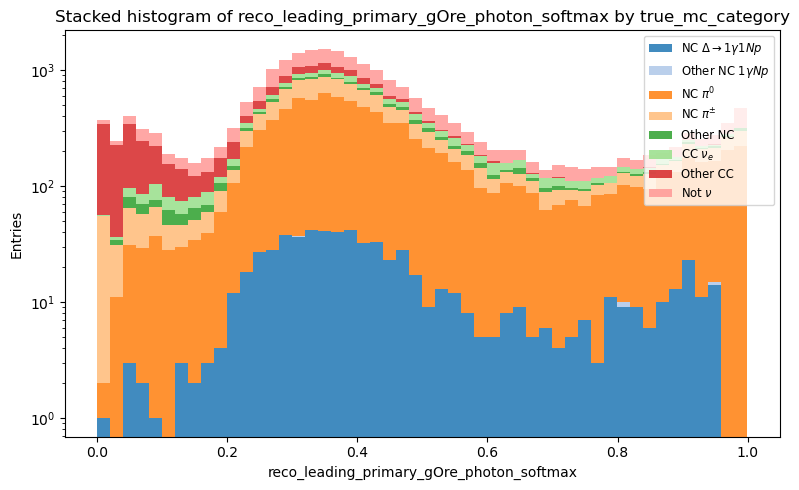

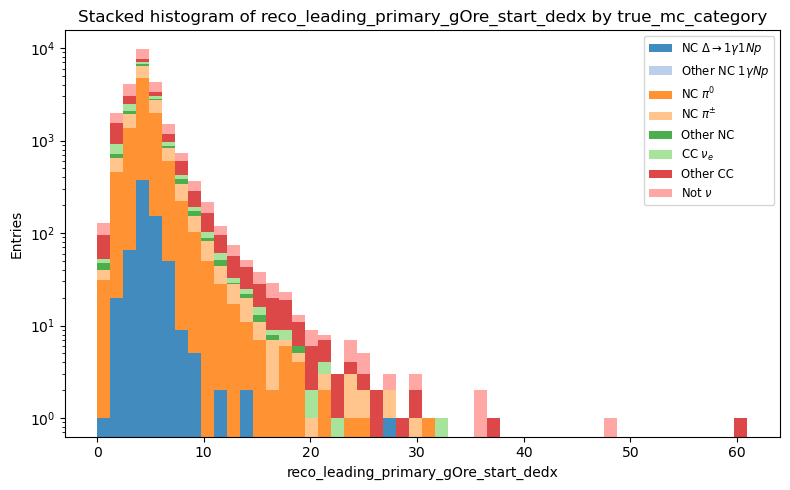

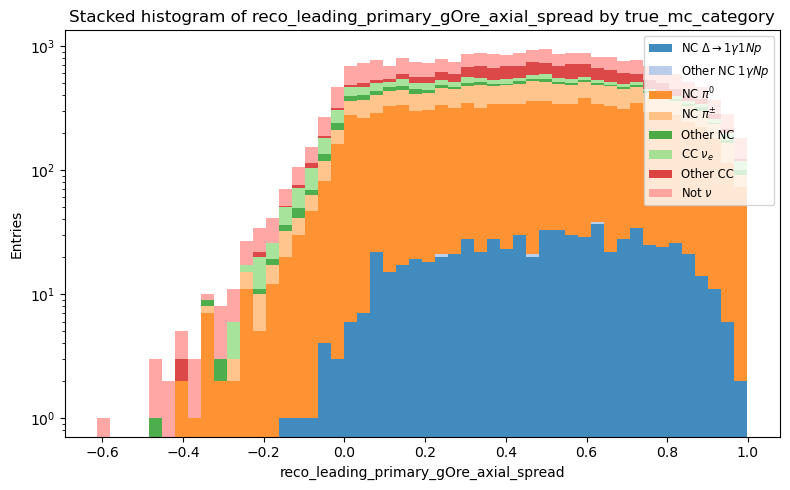

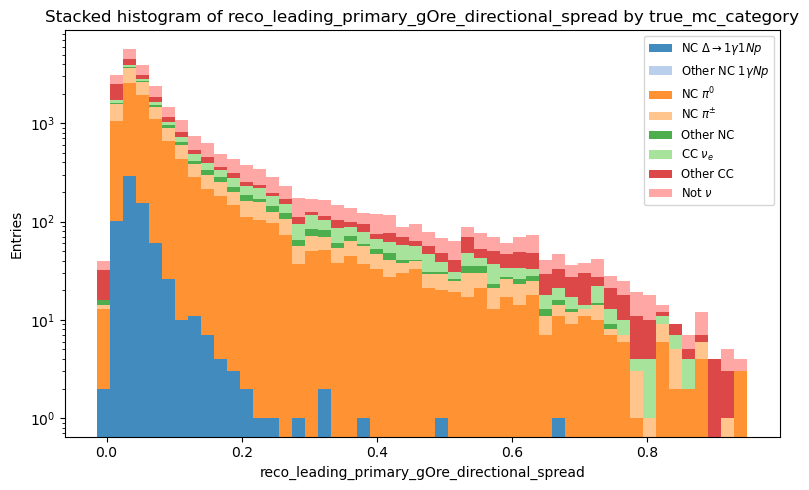

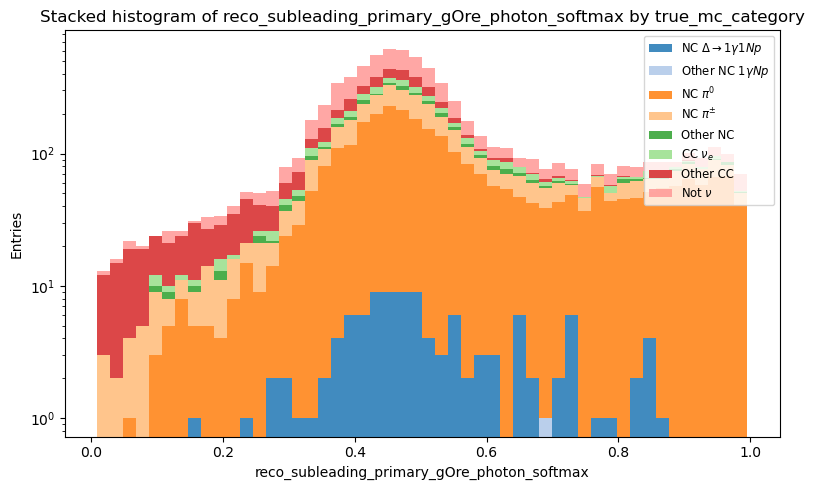

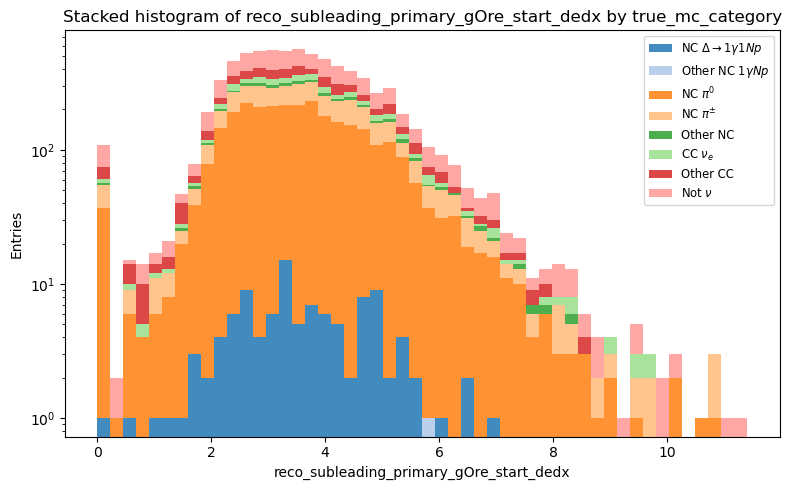

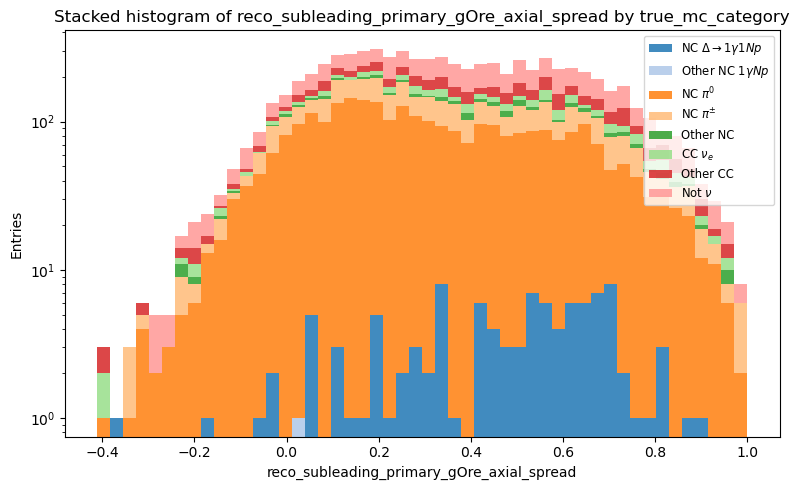

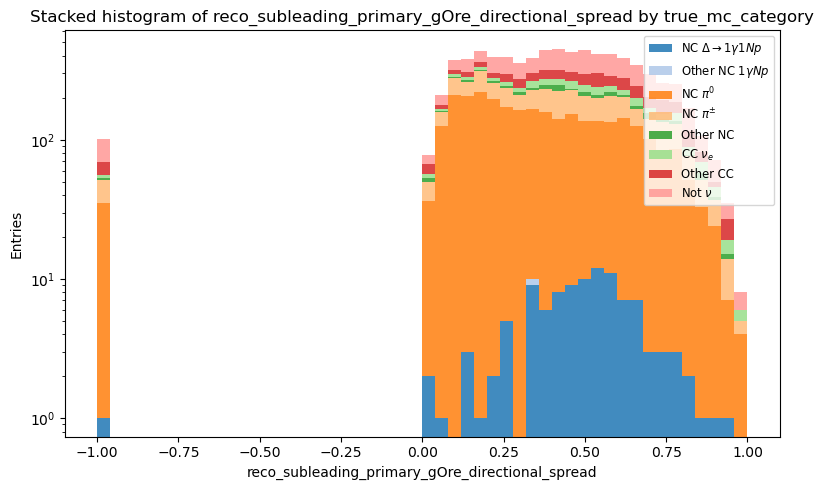

In [90]:
import matplotlib.pyplot as plt
import numpy as np

variables = ['reco_leading_primary_gOre_photon_softmax',
             'reco_leading_primary_gOre_start_dedx',
             'reco_leading_primary_gOre_axial_spread',
             'reco_leading_primary_gOre_directional_spread',
             'reco_subleading_primary_gOre_photon_softmax',
             'reco_subleading_primary_gOre_start_dedx',
             'reco_subleading_primary_gOre_axial_spread',
             'reco_subleading_primary_gOre_directional_spread']

data = OneG0p.arrays(['true_mc_category', 'true_category'] + variables, library="np")

# Category labels in order (0..7) — use LaTeX math for Greek/arrow
labels = [
    r'NC $\Delta\rightarrow1\gamma 1Np$',
    r'Other NC 1$\gamma Np$',
    r'NC $\pi^{0}$',
    r'NC $\pi^{\pm}$',
    r'Other NC',
    r'CC $\nu_e$',
    r'Other CC',
    r'Not $\nu$',
]

# Colors (slice of a colormap to match number of labels)
colors = plt.cm.tab20.colors[:len(labels)]

for var in variables:
    # collect arrays for each category (handles empty arrays)
    arrays = []
    present_labels = []
    for idx, lab in enumerate(labels):
        mask = (data['true_mc_category'] == idx)
        vals = data[var][mask]
        arrays.append(vals)
        present_labels.append(lab)

    plt.figure(figsize=(8,5))
    plt.hist(arrays, bins=50, stacked=True, label=present_labels, color=colors, alpha=0.85)
    plt.xlabel(var)
    plt.ylabel('Entries')
    plt.yscale('log')
    plt.legend(loc='upper right', fontsize='small')
    plt.title(f'Stacked histogram of {var} by true_mc_category')
    plt.tight_layout()
    plt.show()

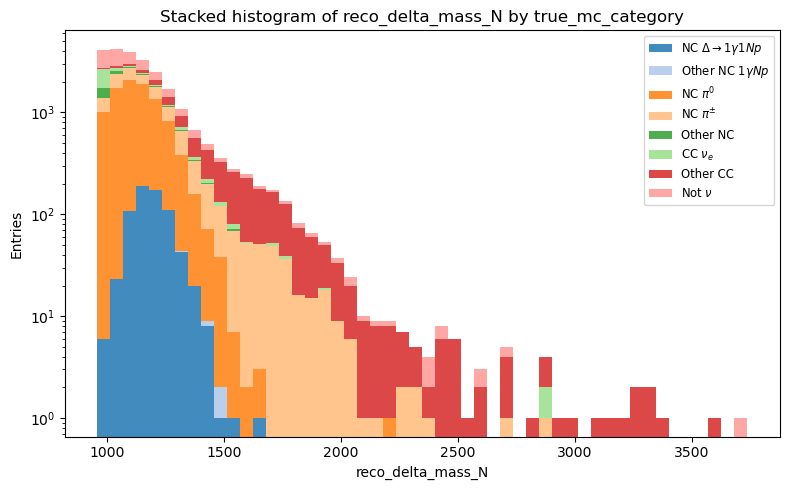

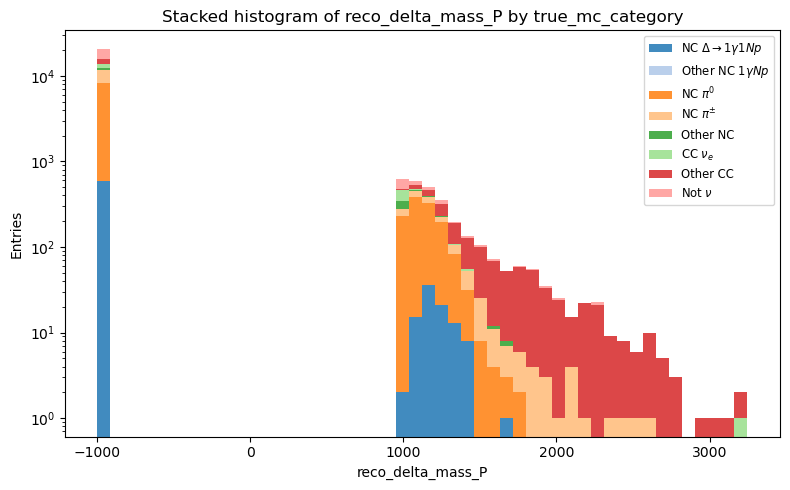

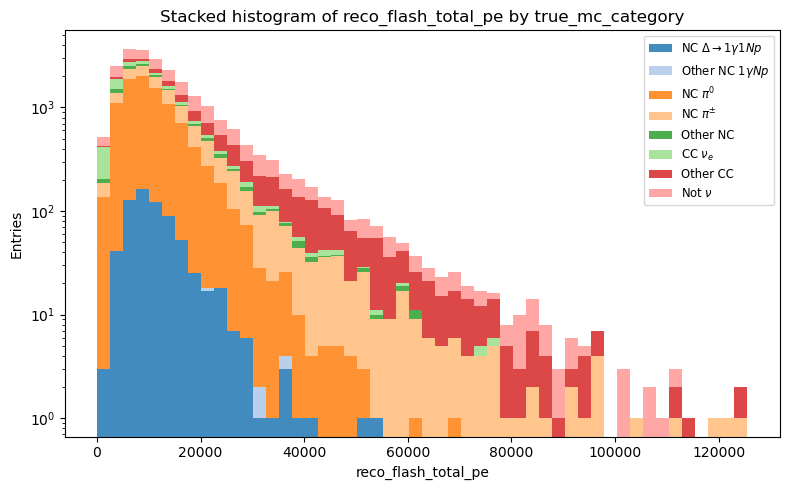

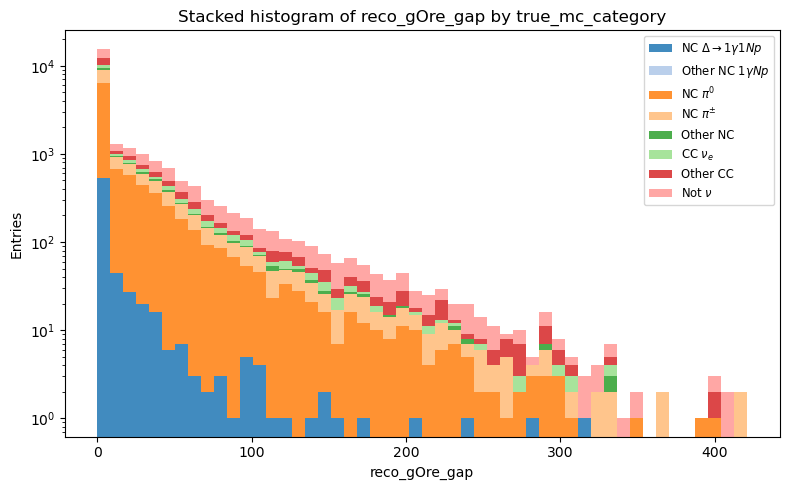

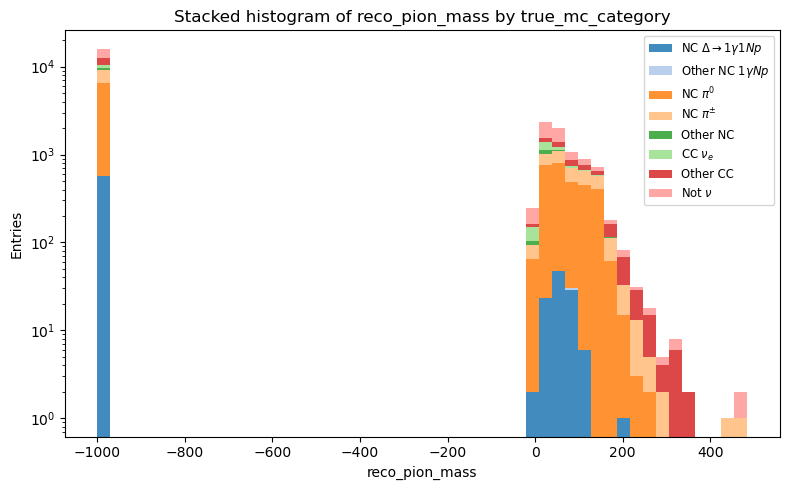

In [113]:
import matplotlib.pyplot as plt
import numpy as np

variables = ['reco_delta_mass_N',
             'reco_delta_mass_P',
             'reco_flash_total_pe',
             'reco_gOre_gap',
             'reco_pion_mass',
            #  'reco_leading_primary_proton_azimuthal_angle',
            #  'reco_leading_primary_proton_dpT',
            #  'reco_leading_primary_proton_iou',
            #  'reco_leading_primary_proton_ke',
            #  'reco_leading_primary_proton_length',
            #  'reco_leading_primary_proton_polar_angle',
            #  'reco_leading_primary_proton_primary_softmax',
            #  'reco_leading_primary_proton_proton_softmax',
             ]

data = OneG0p.arrays(['true_mc_category', 'true_category'] + variables, library="np")


# Category labels in order (0..7) — use LaTeX math for Greek/arrow
labels = [
    r'NC $\Delta\rightarrow1\gamma 1Np$',
    r'Other NC 1$\gamma Np$',
    r'NC $\pi^{0}$',
    r'NC $\pi^{\pm}$',
    r'Other NC',
    r'CC $\nu_e$',
    r'Other CC',
    r'Not $\nu$',
]

# Colors (slice of a colormap to match number of labels)
colors = plt.cm.tab20.colors[:len(labels)]

for var in variables:
    # collect arrays for each category (handles empty arrays)
    arrays = []
    present_labels = []
    for idx, lab in enumerate(labels):
        mask = (data['true_mc_category'] == idx)
        vals = data[var][mask]
        arrays.append(vals)
        present_labels.append(lab)

    plt.figure(figsize=(8,5))
    plt.hist(arrays, bins=50, stacked=True, label=present_labels, color=colors, alpha=0.85)
    plt.xlabel(var)
    plt.ylabel('Entries')
    plt.yscale('log')
    plt.legend(loc='upper right', fontsize='small')
    plt.title(f'Stacked histogram of {var} by true_mc_category')
    plt.tight_layout()
    plt.show()